In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [15]:


################

T, P = np.meshgrid(np.linspace(273.15-80.,273.15+50., 100), np.linspace(1e5,1e4, 100)); n=1

def altitude_from_PT(P,T):
    rho = Mgaz* P / (R*T)
    dp = P[1:,:]-P[:-1,:]
    z = rho*0.
    z[1:,:] = -np.cumsum(dp/(rho[1:,]*g),axis=0)
    return z




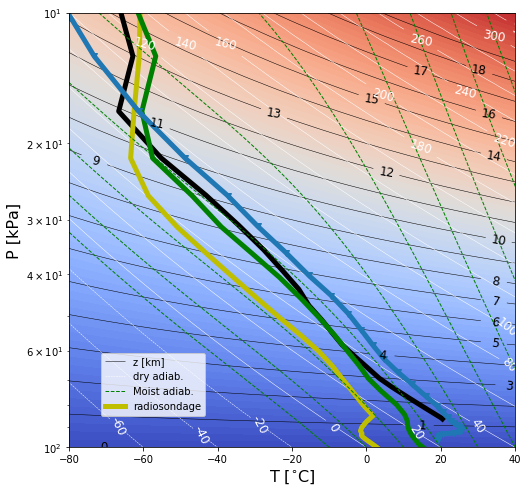

In [24]:
plt.figure(figsize=(8,8))
ax = plt.gca()

ax.invert_yaxis()
plt.contourf(T-273.15, P*1e-3, altitude*1e-3,100,cmap=cm.coolwarm);
#plt.colorbar(shrink=0.5)

CS1 = plt.contour(T-273.15, P*1e-3, altitude*1e-3, np.arange(0,20000,1000)*1e-3,colors=('k',),linewidths=(0.5,));
plot1,_ = CS1.legend_elements()
plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=12)

CS2 = plt.contour(T-273.15, P*1e-3, Tpot-273.15, np.arange(-100,500,20), colors=('w',),linewidths=(0.5,));
plot2,_ = CS2.legend_elements()
plt.clabel(CS2, fmt = '%2.0f', colors = 'w', fontsize=12)

plt.plot(Tc1,P1/10,'k',linewidth=5)
plot4, = plt.plot(Tc2,P2/10,'y',linewidth=5)
plt.plot(Tc3,P3/10,'g',linewidth=5)
plt.plot(Tc4,P4/10,'-v',linewidth=5)

for T0 in range(-10,200,10):
    P1d  = np.arange(100000.,1000,-100)
    [T_moist,z_moist] = moist_temperature_pot(T0+273.15,P1d)
    plot3, = plt.plot(T_moist-273.15,P1d*1e-3,'--g',linewidth=1); plt.ylim([1e5,1e4])

ax.set_xlabel('T [$^{\circ}$C]',fontsize=16); ax.set_ylabel('P [kPa]',fontsize=16); 
ax.set_ylim([100,10]); ax.set_xlim([-80,40])
ax.set_yscale('log')

plt.legend([plot1[0],plot2[0],plot3,plot4], ['z [km]','dry adiab.','Moist adiab.','radiosondage'],bbox_to_anchor=(0.05, 0.05),loc=3, borderaxespad=1.)   


plt.savefig('profiles.png',dpi=100)